In [3]:
import pandas as pd
df = pd.read_csv("diabetic_data.csv")

print("Shape: ", df.shape)

df.head()

Shape:  (101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
# Step 1: List all column names
print("Columns:\n", df.columns.tolist())

# Step 2: Quick check for missing values (count of ? or NaN)
missing_counts = (df == '?').sum()
print("\nMissing counts (using '?'):\n", missing_counts[missing_counts > 0])

# Step 3: Verify also real NaNs if any
print("\nNull counts (NaN):\n", df.isnull().sum()[df.isnull().sum() > 0])


Columns:
 ['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']

Missing counts (using '?'):
 race                  2273
weight               98569
payer_code           40256
medical_specialty    49949
diag_1                  21
diag_2 

In [5]:
total_rows = len(df)

missing_summary = pd.DataFrame({
    "missing_count": (df == '?').sum() + df.isnull().sum(),
})
missing_summary["missing_percent"] = 100 * missing_summary["missing_count"] / total_rows

print(missing_summary.sort_values("missing_percent", ascending=False))


                          missing_count  missing_percent
weight                            98569        96.858479
max_glu_serum                     96420        94.746772
A1Cresult                         84748        83.277322
medical_specialty                 49949        49.082208
payer_code                        40256        39.557416
race                               2273         2.233555
diag_3                             1423         1.398306
diag_2                              358         0.351787
diag_1                               21         0.020636
encounter_id                          0         0.000000
troglitazone                          0         0.000000
tolbutamide                           0         0.000000
pioglitazone                          0         0.000000
rosiglitazone                         0         0.000000
acarbose                              0         0.000000
miglitol                              0         0.000000
citoglipton                    

In [6]:
"""
Note: 
If >70–80% missing → Drop (too noisy, adds no value).
If 30–70% missing → Depends on business importance.
If <30% missing → Keep, but handle carefully (impute, recode)
"""

# Drop very high missing columns
df = df.drop(columns=["weight", "max_glu_serum", "A1Cresult"])

# Replace '?' with 'Unknown' in selected categorical columns
for col in ["race", "medical_specialty", "payer_code", "diag_1", "diag_2", "diag_3"]:
    df[col] = df[col].replace("?", "Unknown")


In [7]:
# Info summary
df.info()

# Check unique values for some categorical columns
for col in ["race", "gender", "age", "admission_type_id", 
            "discharge_disposition_id", "admission_source_id", 
            "readmitted"]:
    print(f"\n{col} → {df[col].unique()[:15]}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   admission_type_id         101766 non-null  int64 
 6   discharge_disposition_id  101766 non-null  int64 
 7   admission_source_id       101766 non-null  int64 
 8   time_in_hospital          101766 non-null  int64 
 9   payer_code                101766 non-null  object
 10  medical_specialty         101766 non-null  object
 11  num_lab_procedures        101766 non-null  int64 
 12  num_procedures            101766 non-null  int64 
 13  num_medications           101766 non-null  int64 
 14  numb

In [8]:
# Separate categorical and numerical features
categorical_cols = df.select_dtypes(include="object").columns.tolist()
numerical_cols = df.select_dtypes(include="int64").columns.tolist()

print("Categorical columns (sample 10):", categorical_cols[:10])
print("Total categorical:", len(categorical_cols))
print("\nNumerical columns:", numerical_cols)
print("Total numerical:", len(numerical_cols))


Categorical columns (sample 10): ['race', 'gender', 'age', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'metformin', 'repaglinide']
Total categorical: 34

Numerical columns: ['encounter_id', 'patient_nbr', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
Total numerical: 13


In [9]:
# Load datasets
mapping = pd.read_csv("IDS_mapping.csv")

# Since IDS_mapping actually contains 3 separate tables,
# we need to load them separately instead of as a single CSV.
admission_type_map = {
    1: "Emergency", 2: "Urgent", 3: "Elective", 4: "Newborn",
    5: "Not Available", 6: None, 7: "Trauma Center", 8: "Not Mapped"
}

discharge_map = {
    1: "Discharged to home", 2: "Discharged/transferred to another short term hospital",
    3: "Discharged/transferred to SNF", 4: "Discharged/transferred to ICF",
    5: "Discharged/transferred to another type of inpatient care institution",
    6: "Discharged/transferred to home with home health service",
    7: "Left AMA", 8: "Discharged/transferred to home under care of Home IV provider",
    9: "Admitted as an inpatient to this hospital",
    10: "Neonate discharged to another hospital for neonatal aftercare",
    11: "Expired", 12: "Still patient or expected to return for outpatient services",
    13: "Hospice / home", 14: "Hospice / medical facility",
    15: "Discharged/transferred within this institution to Medicare approved swing bed",
    16: "Discharged/transferred/referred another institution for outpatient services",
    17: "Discharged/transferred/referred to this institution for outpatient services",
    18: None, 19: "Expired at home. Medicaid only, hospice.",
    20: "Expired in a medical facility. Medicaid only, hospice.",
    21: "Expired, place unknown. Medicaid only, hospice.",
    22: "Discharged/transferred to another rehab fac including rehab units of a hospital",
    23: "Discharged/transferred to a long term care hospital",
    24: "Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare",
    25: "Not Mapped", 26: "Unknown/Invalid",
    27: "Discharged/transferred to a federal health care facility",
    28: "Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital",
    29: "Discharged/transferred to a Critical Access Hospital (CAH)",
    30: "Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere"
}

admission_source_map = {
    1: "Physician Referral", 2: "Clinic Referral", 3: "HMO Referral",
    4: "Transfer from a hospital", 5: "Transfer from a Skilled Nursing Facility (SNF)",
    6: "Transfer from another health care facility", 7: "Emergency Room",
    8: "Court/Law Enforcement", 9: "Not Available", 10: "Transfer from critical access hospital",
    11: "Normal Delivery", 12: "Premature Delivery", 13: "Sick Baby",
    14: "Extramural Birth", 15: "Not Available", 17: None,
    18: "Transfer From Another Home Health Agency", 19: "Readmission to Same Home Health Agency",
    20: "Not Mapped", 21: "Unknown/Invalid",
    22: "Transfer from hospital inpt/same fac reslt in a sep claim",
    23: "Born inside this hospital", 24: "Born outside this hospital",
    25: "Transfer from Ambulatory Surgery Center", 26: "Transfer from Hospice"
}

# Apply mappings
df["admission_type_id"] = df["admission_type_id"].map(admission_type_map)
df["discharge_disposition_id"] = df["discharge_disposition_id"].map(discharge_map)
df["admission_source_id"] = df["admission_source_id"].map(admission_source_map)

# Check sample
print(df[["admission_type_id", "discharge_disposition_id", "admission_source_id"]].head(10))


  admission_type_id       discharge_disposition_id       admission_source_id
0              None                     Not Mapped        Physician Referral
1         Emergency             Discharged to home            Emergency Room
2         Emergency             Discharged to home            Emergency Room
3         Emergency             Discharged to home            Emergency Room
4         Emergency             Discharged to home            Emergency Room
5            Urgent             Discharged to home           Clinic Referral
6          Elective             Discharged to home           Clinic Referral
7         Emergency             Discharged to home            Emergency Room
8            Urgent             Discharged to home  Transfer from a hospital
9          Elective  Discharged/transferred to SNF  Transfer from a hospital


In [10]:

# Count "?" as missing
df_missing = (df.replace("?", pd.NA)
              .isna()
              .sum()
              .to_frame("missing_count"))

df_missing["missing_percent"] = (df_missing["missing_count"] / len(df)) * 100

# Sort descending by missingness
df_missing.sort_values("missing_percent", ascending=False).head(15)


,missing_count,missing_percent
admission_source_id,6781,6.663326
admission_type_id,5291,5.199182
discharge_disposition_id,3691,3.626948
encounter_id,0,0.000000
examide,0,0.000000
glipizide,0,0.000000
glyburide,0,0.000000
tolbutamide,0,0.000000
pioglitazone,0,0.000000
rosiglitazone,0,0.000000


In [11]:
df["admission_source_id"].fillna("Unknown/NotMapped", inplace=True)
df["admission_type_id"].fillna("Unknown/NotMapped", inplace=True)
df["discharge_disposition_id"].fillna("Unknown/NotMapped", inplace=True)


C:\Users\Rajeev's PC\AppData\Local\Temp\ipykernel_3232\263439563.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["admission_source_id"].fillna("Unknown/NotMapped", inplace=True)
C:\Users\Rajeev's PC\AppData\Local\Temp\ipykernel_3232\263439563.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [12]:
df["readmitted_binary"] = df["readmitted"].replace({
    "NO": 0,
    ">30": 0,
    "<30": 1
})


C:\Users\Rajeev's PC\AppData\Local\Temp\ipykernel_3232\871046350.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["readmitted_binary"] = df["readmitted"].replace({


In [13]:
df["readmitted_binary"].value_counts(normalize=True)


readmitted_binary
0    0.888401
1    0.111599
Name: proportion, dtype: float64

In [14]:
from sklearn.preprocessing import LabelEncoder

# Make a copy so we don't lose original
df_encoded = df.copy()

# List of categorical cols (from earlier analysis)
categorical_cols = df.select_dtypes(include=["object"]).columns

# Apply Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))


In [15]:
df_encoded.head()


,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_binary
0,2278392,8222157,2,0,0,6,23,8,1,16,...,1,1,0,0,0,0,1,0,2,0
1,149190,55629189,2,0,1,1,1,2,3,16,...,3,1,0,0,0,0,0,1,1,0
2,64410,86047875,0,0,2,1,1,2,2,16,...,1,1,0,0,0,0,1,1,2,0
3,500364,82442376,2,1,3,1,1,2,2,16,...,3,1,0,0,0,0,0,1,2,0
4,16680,42519267,2,1,4,1,1,2,1,16,...,2,1,0,0,0,0,0,1,2,0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Feature-Target Split
X = df_encoded.drop(columns=['readmitted', 'readmitted_binary'])
y = df_encoded['readmitted_binary']

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
log_reg.fit(X_train, y_train)

# 4. Predictions
y_pred = log_reg.predict(X_test)

# 5. Evaluation
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

acc, cm, report


C:\Users\Rajeev's PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Rajeev's PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Rajeev's PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavio

(0.888404847690796,
 array([[27123,     0],
        [ 3407,     0]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.89      1.00      0.94     27123\n           1       0.00      0.00      0.00      3407\n\n    accuracy                           0.89     30530\n   macro avg       0.44      0.50      0.47     30530\nweighted avg       0.79      0.89      0.84     30530\n')

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, zero_division=0))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94     27123
           1       0.00      0.00      0.00      3407

    accuracy                           0.89     30530
   macro avg       0.44      0.50      0.47     30530
weighted avg       0.79      0.89      0.84     30530



In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight="balanced", random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=0))


              precision    recall  f1-score   support

           0       0.89      0.61      0.72     27123
           1       0.12      0.41      0.18      3407

    accuracy                           0.59     30530
   macro avg       0.50      0.51      0.45     30530
weighted avg       0.81      0.59      0.66     30530



In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight="balanced", random_state=42, n_estimators=200)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print(classification_report(y_test, rf_pred, zero_division=0))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94     27123
           1       0.67      0.00      0.01      3407

    accuracy                           0.89     30530
   macro avg       0.78      0.50      0.47     30530
weighted avg       0.86      0.89      0.84     30530



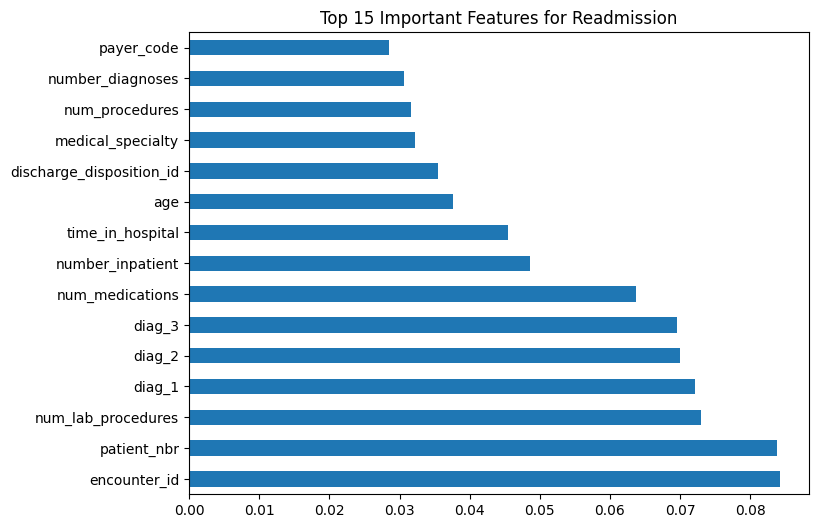

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

importances = rf.feature_importances_
features = X_train.columns

feat_importances = pd.Series(importances, index=features).sort_values(ascending=False)[:15]

feat_importances.plot(kind="barh", figsize=(8,6))
plt.title("Top 15 Important Features for Readmission")
plt.show()


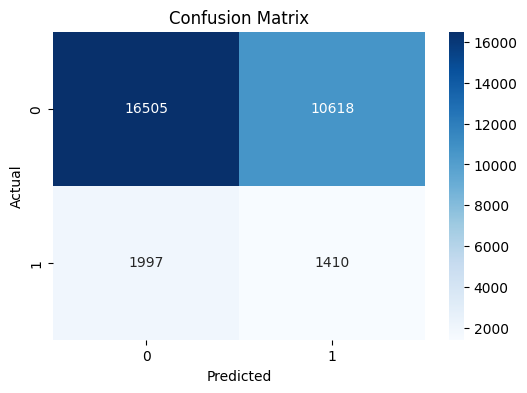

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate predictions
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Confusion Matrix:
 [[27117     6]
 [ 3392    15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     27123
           1       0.71      0.00      0.01      3407

    accuracy                           0.89     30530
   macro avg       0.80      0.50      0.47     30530
weighted avg       0.87      0.89      0.84     30530



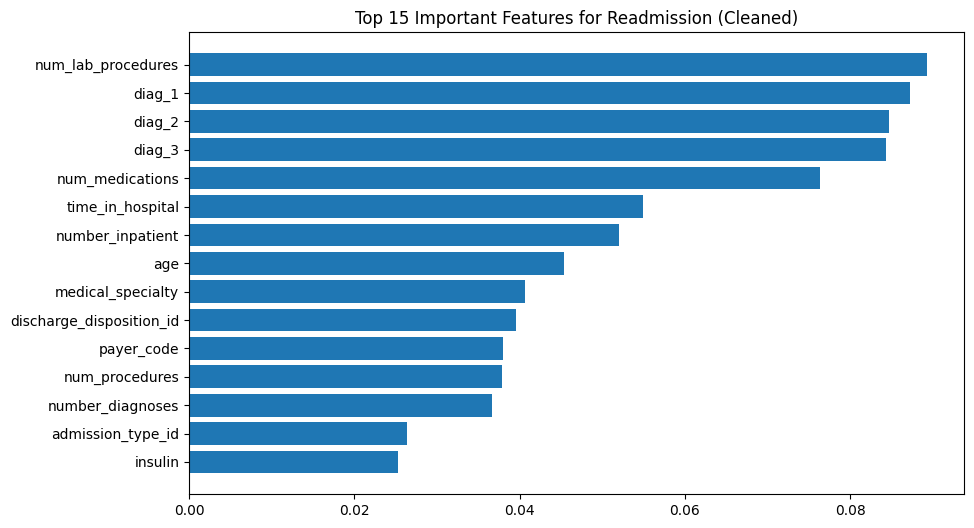

In [22]:
# Step 1: Drop ID columns
X_train_clean = X_train.drop(['encounter_id', 'patient_nbr'], axis=1)
X_test_clean = X_test.drop(['encounter_id', 'patient_nbr'], axis=1)

# Step 2: Retrain the model
from sklearn.ensemble import RandomForestClassifier
rf_model_clean = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model_clean.fit(X_train_clean, y_train)

# Step 3: Predictions and evaluation
y_pred_clean = rf_model_clean.predict(X_test_clean)

from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_clean))
print("\nClassification Report:\n", classification_report(y_test, y_pred_clean))

# Step 4: Feature importance plot (top 15)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

importances = rf_model_clean.feature_importances_
indices = np.argsort(importances)[-15:]
plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X_train_clean.columns[i] for i in indices])
plt.title("Top 15 Important Features for Readmission (Cleaned)")
plt.show()


In [23]:
# Step 1: Apply SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_clean, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_bal.value_counts())

# Step 2: Retrain model on balanced data
rf_model_bal = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model_bal.fit(X_train_bal, y_train_bal)

# Step 3: Evaluate on test set
y_pred_bal = rf_model_bal.predict(X_test_clean)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bal))

print("\nClassification Report:\n", classification_report(y_test, y_pred_bal))



Before SMOTE: readmitted_binary
0    63286
1     7950
Name: count, dtype: int64
After SMOTE: readmitted_binary
0    63286
1    63286
Name: count, dtype: int64
Confusion Matrix:
 [[26301   822]
 [ 3191   216]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93     27123
           1       0.21      0.06      0.10      3407

    accuracy                           0.87     30530
   macro avg       0.55      0.52      0.51     30530
weighted avg       0.82      0.87      0.84     30530



In [24]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    random_state=42,
    scale_pos_weight=(y_train.value_counts()[0] / y_train.value_counts()[1]),  # handle imbalance
    eval_metric='logloss'
)

xgb_model.fit(X_train_clean, y_train)

y_pred_xgb = xgb_model.predict(X_test_clean)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


Confusion Matrix:
 [[19824  7299]
 [ 1780  1627]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.73      0.81     27123
           1       0.18      0.48      0.26      3407

    accuracy                           0.70     30530
   macro avg       0.55      0.60      0.54     30530
weighted avg       0.84      0.70      0.75     30530



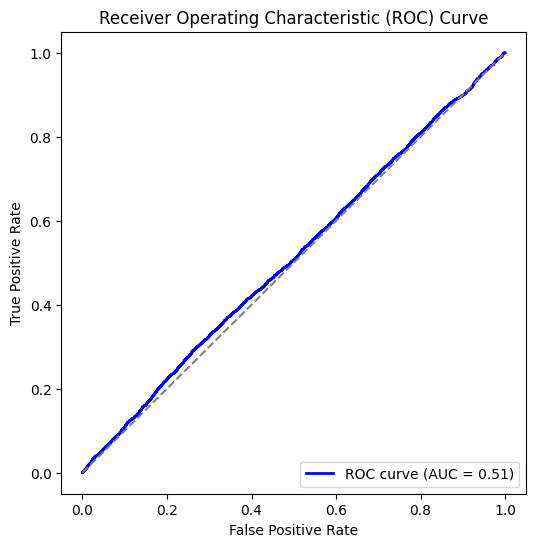

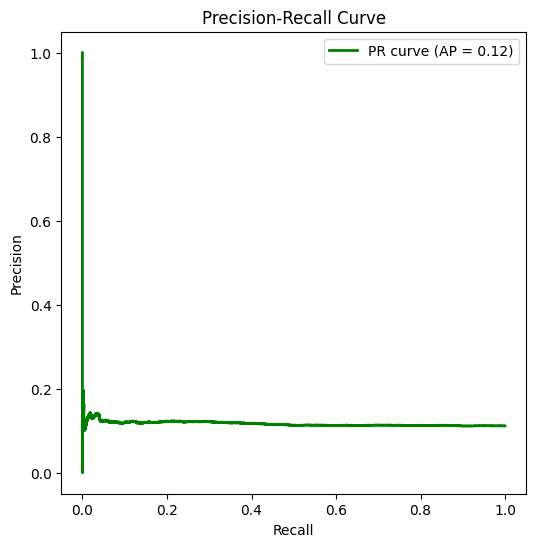

In [30]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# ✅ Step 1: Get prediction probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]   # probability for class "1"

# ✅ Step 2: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# ✅ Step 3: Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
avg_prec = average_precision_score(y_test, y_pred_proba)

plt.figure(figsize=(6,6))
plt.plot(recall, precision, color='green', lw=2, label='PR curve (AP = %0.2f)' % avg_prec)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

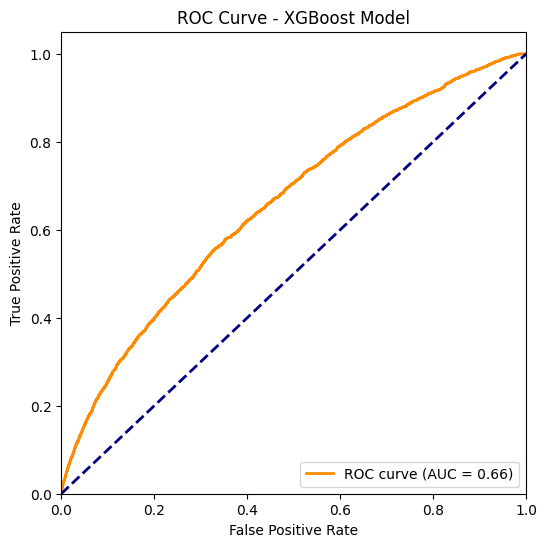

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for class 1
# Drop unnecessary ID columns if present
X_test = X_test.drop(columns=['encounter_id', 'patient_nbr'], errors='ignore')

y_proba = xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost Model')
plt.legend(loc="lower right")
plt.show()


In [36]:
import pickle

# Save the chosen model (example: xgb_model)
with open("xgb_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)
    print("Saved")

# To load it back later
"""
with open("final_readmission_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)
"""
# Example test

#y_pred_loaded = xgb_model.predict(X_test)


Saved
[1 1 0 ... 1 0 0]


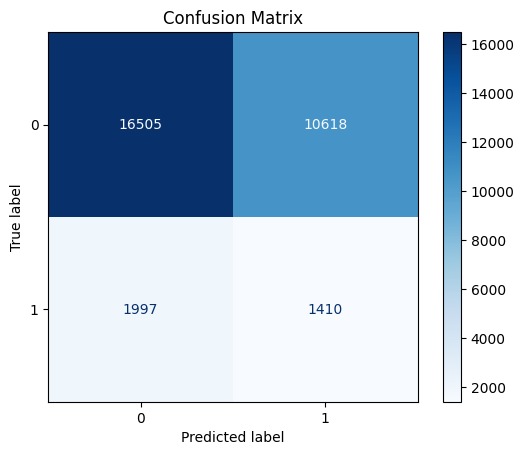

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# y_test : true labels
# y_pred : predicted labels (from your model)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches="tight")  # save inside repo
plt.show()
